<a href="https://colab.research.google.com/github/CorleoneAppolonia/PMP-2024/blob/main/Lab02/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ex. 1:

In [7]:
import csv
import random

# Calea către fișierul .csv
filename = 'lista_studenti.csv'

# Citim numele studenților din fișierul CSV
with open(filename, 'r') as file:
    csv_reader = csv.reader(file)
    lista_studenti = [row[0] for row in csv_reader]

# Introdu numarul de studenti pe care vrei sa ii selectezi
numar_studenti_de_selectat = int(input("Introduceți numărul de studenți care nu au prezentat încă tema: "))

# Verificam daca numarul de studenti de selectat este valid
if numar_studenti_de_selectat > len(lista_studenti):
    print(f"Numărul introdus este prea mare. Sunt disponibili doar {len(lista_studenti)} studenți.")
else:
    # Selectam un esantion aleatoriu
    studenti_selectati = random.sample(lista_studenti, numar_studenti_de_selectat)

    # Afisam studentii selectati
    print(f"Studenți selectați care nu au prezentat încă tema: {', '.join(studenti_selectati)}")

Introduceți numărul de studenți care nu au prezentat încă tema: 3
Studenți selectați care nu au prezentat încă tema: Elena Marinescu, Cristian Dinu, Alexandru Georgescu



**Exercitiul 2**

Media sumei S: 0.0127


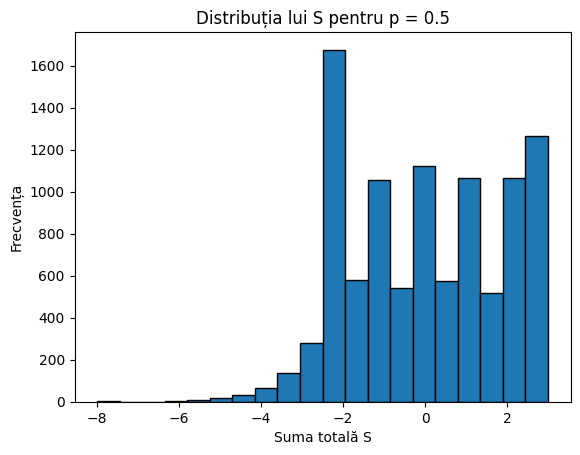

Media sumei S: -0.6607


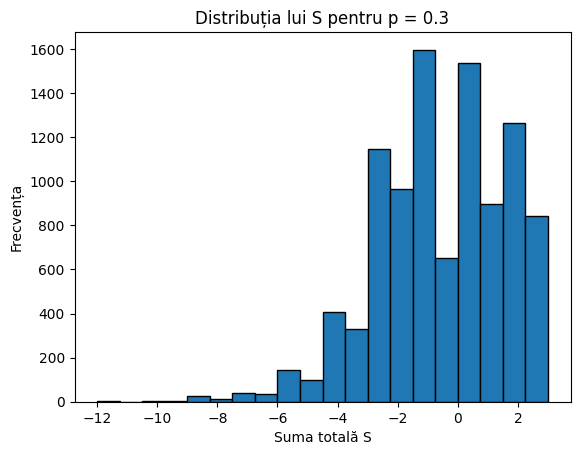

Media sumei S: 0.2804


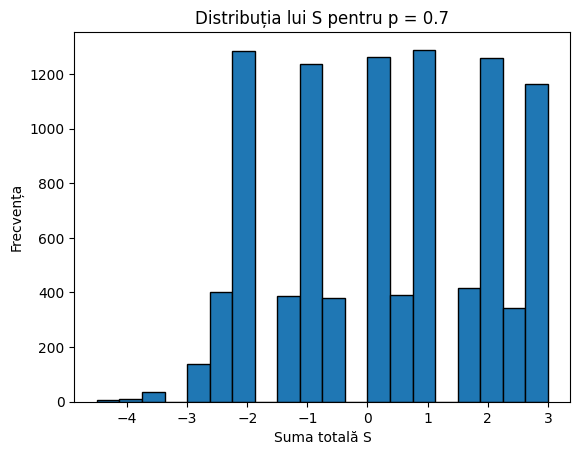

In [10]:
import random
import matplotlib.pyplot as plt

# Simulam jocul dintre cei doi prieteni
def simulare_joc(probabilitate_stema=0.5):
    n = 0  # numărul de pași
    suma_totală = 0

    while True:
        n += 1
        rezultat_moneda = random.random() < probabilitate_stema
        if rezultat_moneda:  # Dacă pică stemă
            rezultat_zar = random.randint(1, 6)
            suma_totală += rezultat_zar - 3
            break
        else:  # Dacă pică ban
            suma_totală -= 0.5

    return n, suma_totală

# Simulam un număr mare de jocuri și determinăm media lui S și distribuția acestuia
def simulare_multiple_jocuri(numar_jocuri, probabilitate_stema=0.5):
    rezultate_n = []
    rezultate_s = []

    for _ in range(numar_jocuri):
        n, suma = simulare_joc(probabilitate_stema)
        rezultate_n.append(n)
        rezultate_s.append(suma)

    # Calculăm media sumei
    media_s = round(sum(rezultate_s) / len(rezultate_s), 4)
    print(f"Media sumei S: {media_s}")

    # Reprezentăm grafic distribuția lui S
    plt.hist(rezultate_s, bins=20, edgecolor='black')
    plt.xlabel('Suma totală S')
    plt.ylabel('Frecvența')
    plt.title(f'Distribuția lui S pentru p = {probabilitate_stema}')
    plt.show()

# Exemplu de rulare
simulare_multiple_jocuri(10000, probabilitate_stema=0.5)

# Repetăm pentru probabilități diferite
simulare_multiple_jocuri(10000, probabilitate_stema=0.3)
simulare_multiple_jocuri(10000, probabilitate_stema=0.7)

**Exercitiul 3**

Media lui X: 0.2317
Deviația standard a lui X: 0.2529


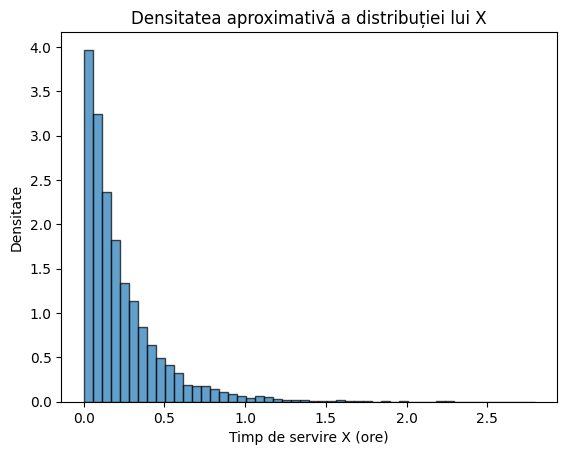

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parametrii distribuțiilor exponențiale pentru cei trei frizeri
lambda1 = 3  # h^-1
lambda2 = 6  # h^-1
lambda3 = 4  # h^-1

# Probabilitățile de preluare a unui client de către fiecare frizer
p1 = 3 / 13
p2 = 6 / 13
p3 = 4 / 13

# Generăm 10.000 de valori pentru X
numar_valori = 10000
valori_X = []

for _ in range(numar_valori):
    # Alegem frizerul pe baza probabilităților date
    frizer = np.random.choice([1, 2, 3], p=[p1, p2, p3])

    # Generăm timpul de servire pe baza frizerului ales
    if frizer == 1:
        timp_servire = np.random.exponential(scale=1/lambda1)
    elif frizer == 2:
        timp_servire = np.random.exponential(scale=1/lambda2)
    else:
        timp_servire = np.random.exponential(scale=1/lambda3)

    valori_X.append(timp_servire)

# Calculăm media și deviația standard a lui X
media_X = np.mean(valori_X)
deviația_standard_X = np.std(valori_X)

print(f"Media lui X: {media_X:.4f}")
print(f"Deviația standard a lui X: {deviația_standard_X:.4f}")

# Realizăm un grafic al densității distribuției lui X folosind histograma
plt.hist(valori_X, bins=50, density=True, edgecolor='black', alpha=0.7)
plt.xlabel('Timp de servire X (ore)')
plt.ylabel('Densitate')
plt.title('Densitatea aproximativă a distribuției lui X')
plt.show()